In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

employees_df = pd.read_csv('employees.csv')
projects_df = pd.read_csv('projects.csv')
asignations_df = pd.read_csv('asignations.csv')

sns.set(style="whitegrid")



#Empleados




Top 5 de empleados con más años en la empresa

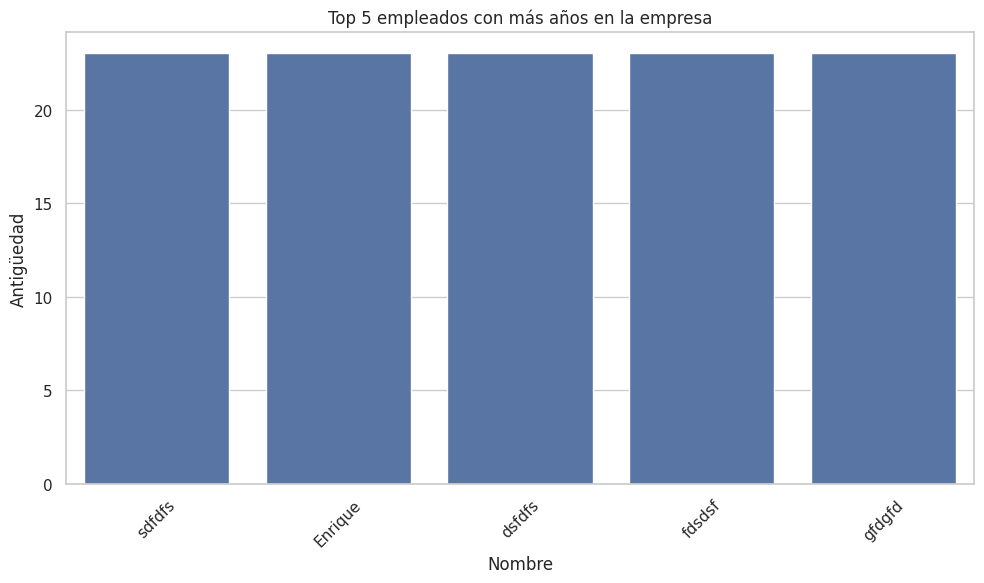

In [2]:
employees_df['A_ALTA'] = pd.to_datetime(employees_df['F_ALTA']);
today = pd.to_datetime('today');
employees_df['yearsWorking'] = today.year - employees_df['A_ALTA'].dt.year

top_5_older_working = employees_df.sort_values(by='yearsWorking', ascending=False).head(5);

plt.figure(figsize=(10,6))
sns.barplot(x='TX_NOMBRE', y='yearsWorking', data=top_5_older_working);
plt.xlabel('Nombre');
plt.ylabel('Antigüedad');
plt.title('Top 5 empleados con más años en la empresa');
plt.xticks(rotation=45);
plt.tight_layout();
plt.show();

Top 5 empleados más recientes

In [8]:
employees_df['A_ALTA'] = pd.to_datetime(employees_df['F_ALTA']);
today = pd.to_datetime('today');
employees_df['yearsWorking'] = today.year - employees_df['A_ALTA'].dt.year

top_5_older_working = employees_df.sort_values(by='yearsWorking', ascending=False).tail(5);
print (top_5_older_working);



    ID_EMPLEADO     TX_NIF TX_NOMBRE TX_APELLIDO1 TX_APELLIDO2 F_NACIMIENTO  \
5            24   probando  probando     probando     probando   2001-07-22   
6            25   probando  probando     probando     probando   2001-07-22   
7            26   probando  probando     probando     probando   2001-07-22   
8            27   probando  probando     probando     probando   2001-07-22   
13           32  78945612A  Jennifer       García      Navarro   2002-04-25   

   N_TELEFONO1 N_TELEFONO2                         TX_EMAIL      F_ALTA  \
5     probando    probando                         probando  2024-05-14   
6     probando    probando                         probando  2024-05-14   
7     probando    probando                         probando  2024-05-14   
8     probando    probando                         probando  2024-05-14   
13   751236974   222554897  jennifergarcianavarro@gmail.com  2024-05-01   

        F_BAJA CX_EDOCIVIL B_SERVMILITAR     A_ALTA  yearsWorking  A_BAJA 

Distribución del número de años de los empleados en la empresa

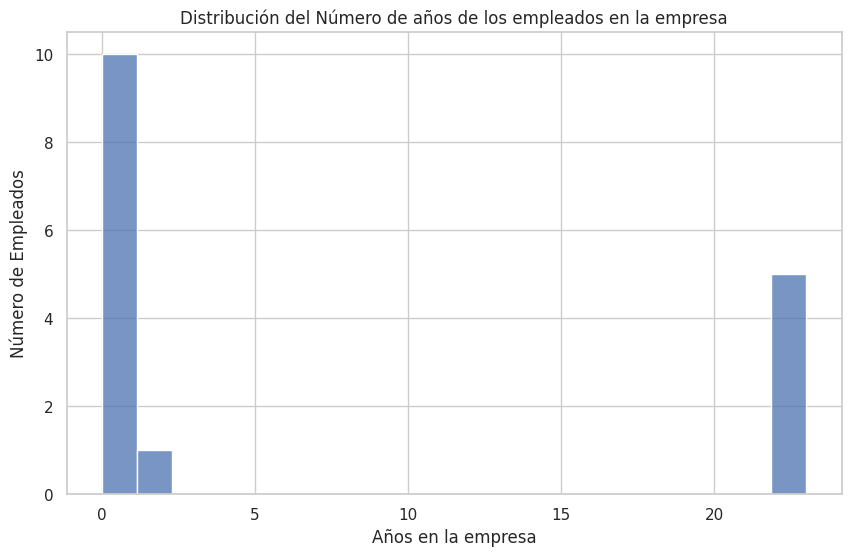

In [4]:
employees_df['A_ALTA'] = pd.to_datetime(employees_df['F_ALTA']);
today = pd.to_datetime('today');
employees_df['yearsWorking'] = today.year - employees_df['A_ALTA'].dt.year

plt.figure(figsize=(10,6));
sns.histplot(employees_df['yearsWorking'], bins=20);
plt.xlabel ('Años en la empresa');
plt.ylabel ('Número de Empleados');
plt.title('Distribución del Número de años de los empleados en la empresa');

Evolución temporal de altas por años

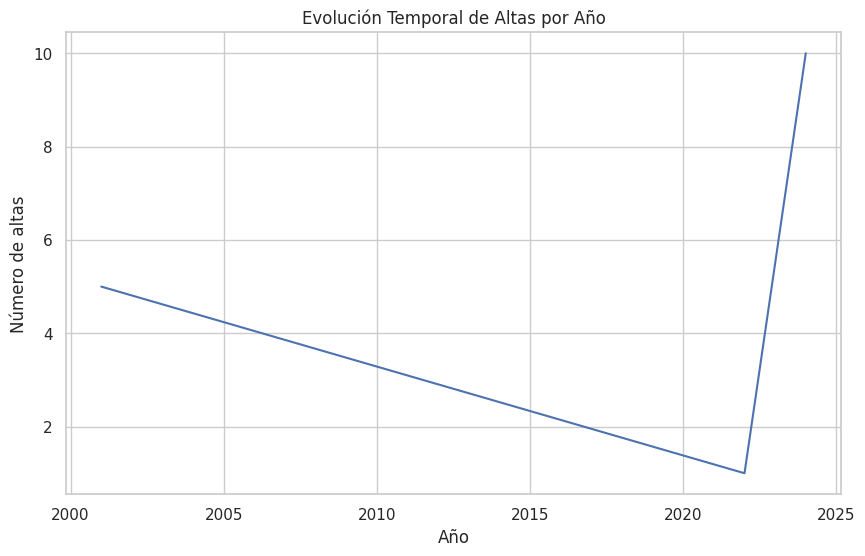

In [ ]:
employees_df['A_ALTA'] = pd.to_datetime(employees_df['F_ALTA']).dt.year;
registrations_per_year = employees_df['A_ALTA'].value_counts().sort_index();
plt.figure(figsize=(10,6));
sns.lineplot(x=registrations_per_year.index, y=registrations_per_year.values);
plt.xlabel('Año');
plt.ylabel('Número de altas');
plt.title('Evolución Temporal de Altas por Año');
plt.show();

Evolución temporal de bajas por años

   A_BAJA  count
0    2024     12


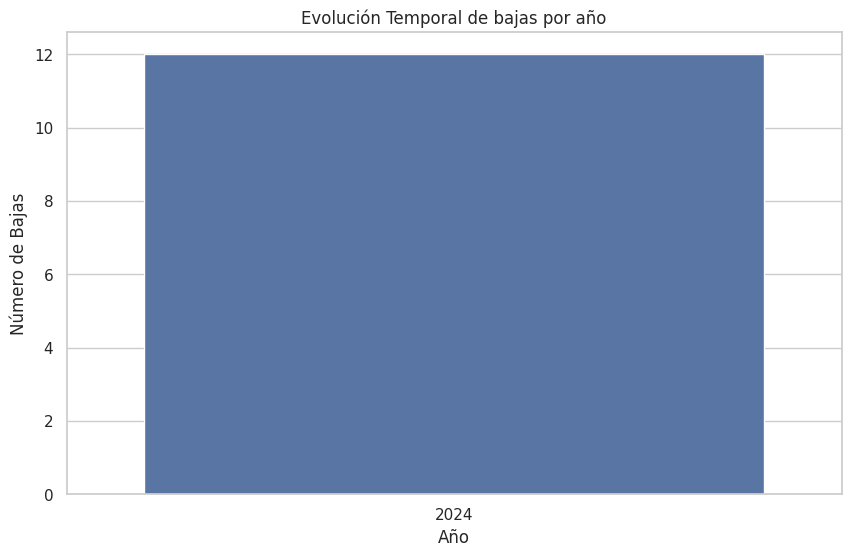

In [17]:
employees_df['A_BAJA'] = pd.to_datetime(employees_df['F_BAJA'],errors='coerce')
valid_ends = employees_df['A_BAJA'].dropna();
ends_per_year = valid_ends.dt.year.value_counts().sort_index().reset_index();
ends_per_year.columns = ['anio','empleados'];
plt.figure(figsize=(10,6));
sns.lineplot(x=ends_per_year['anio'], y=ends_per_year['empleados']);
plt.xlabel('Año');
plt.ylabel('Número de Bajas');
plt.title('Evolución Temporal de bajas por año')
plt.show();

Años de mayor crecimiento/decrecimiento de empleados

In [ ]:
grow = registrations_per_year - ends_per_year;
print (f'Año de mayor crecimiento: {grow.idxmax()}')
print (f'Año de mayor decrecimiento: {grow.idxmin()}')

Año de mayor crecimiento: 2024.0
Año de mayor decrecimiento: 2024.0


Distribución de empleados solteros vs casados

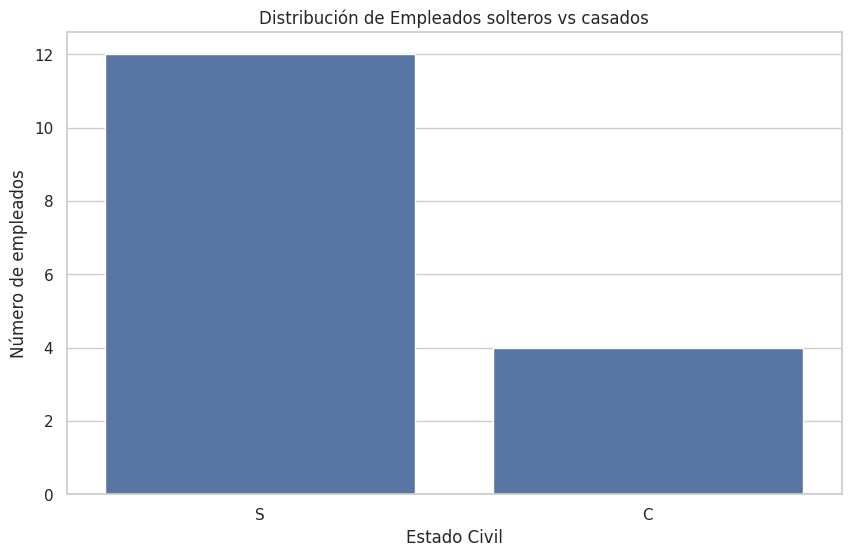

In [ ]:
plt.figure(figsize=(10,6));
sns.countplot(x='CX_EDOCIVIL', data=employees_df);
plt.xlabel('Estado Civil');
plt.ylabel('Número de empleados');
plt.title('Distribución de Empleados solteros vs casados');
plt.show();

Distribución de la edad de los empleados

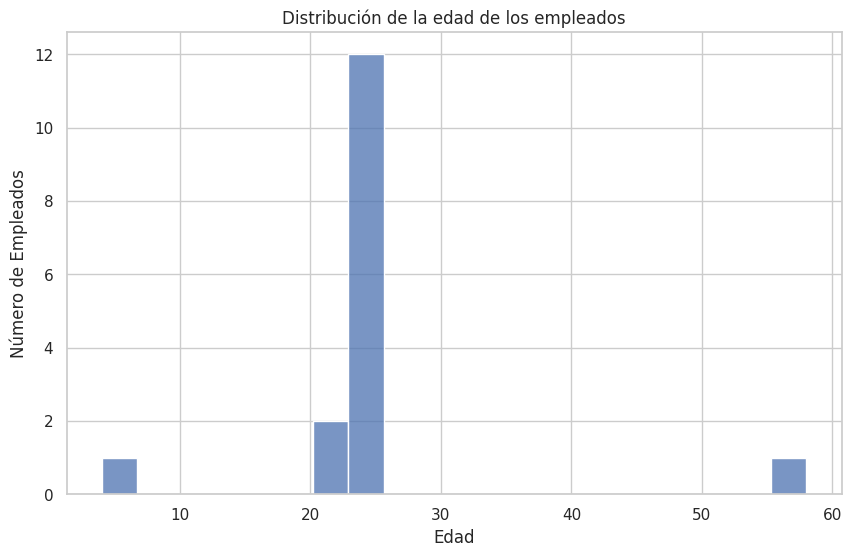

In [ ]:
employees_df['ANO_NACIMIENTO'] = pd.to_datetime(employees_df['F_NACIMIENTO']).dt.year;
today = pd.to_datetime('today');
employees_df['EDAD'] = today.year - employees_df['ANO_NACIMIENTO']

plt.figure(figsize=(10,6));
sns.histplot(employees_df['EDAD'],bins=20);
plt.xlabel('Edad');
plt.ylabel('Número de Empleados');
plt.title('Distribución de la edad de los empleados');
plt.show();

Edad media y desviación típica de los empleados

In [ ]:
avg_age = employees_df['EDAD'].mean();
avg_desviation = employees_df['EDAD'].std();
print (f'Edad media: {avg_age}');
print (f'Desviación típica: {avg_desviation}');

Edad media: 23.875
Desviación típica: 10.249390225764653


# Proyectos


Número de proyectos activos, finalizados y total

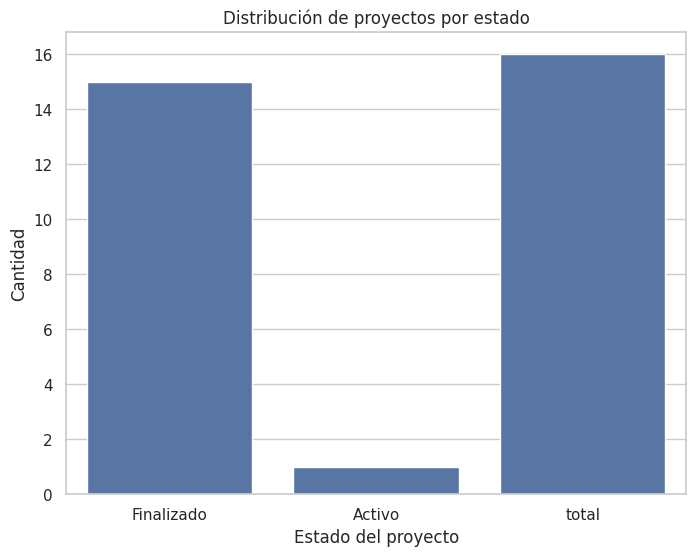

In [ ]:
projects_df['start_date'] = pd.to_datetime(projects_df['F_INICIO']);
projects_df['end_date'] = pd.to_datetime(projects_df['F_FIN']);

projects_df['estado'] = projects_df['end_date'].isnull().apply(lambda x: 'Activo' if x else 'Finalizado');

project_distribution = projects_df['estado'].value_counts();

total_projects = project_distribution.sum();
project_distribution['total'] = total_projects;

plt.figure(figsize=(8,6));
sns.barplot(x=project_distribution.index, y=project_distribution.values);
plt.xlabel('Estado del proyecto');
plt.ylabel('Cantidad');
plt.title('Distribución de proyectos por estado');
plt.show();

Distribución de la duración de los proyectos en historigrama

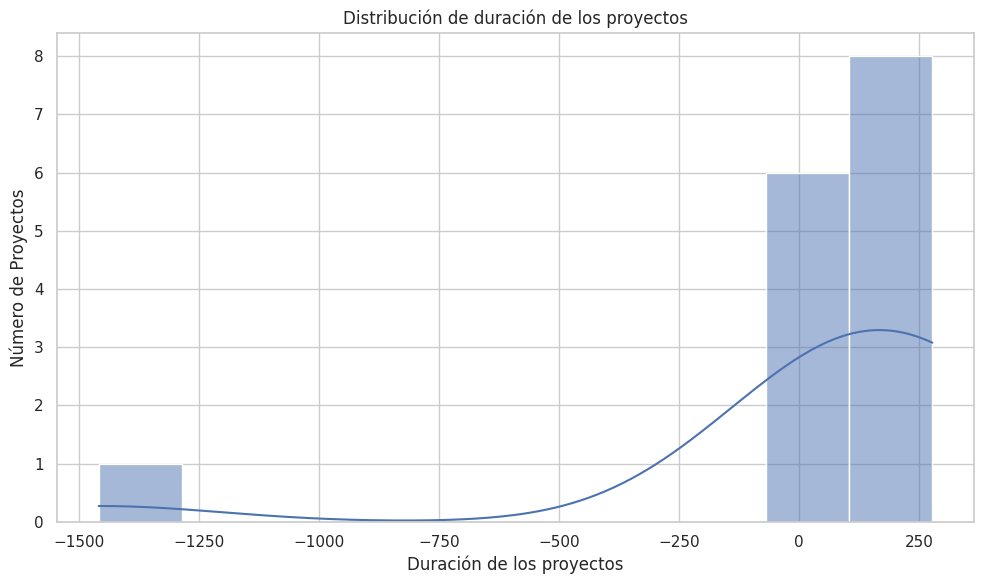

In [20]:
projects_df['fecha_inicio'] = pd.to_datetime(projects_df['F_INICIO'])
projects_df['fecha_fin'] = pd.to_datetime(projects_df['F_FIN'],errors='coerce');

projects_df['duration'] = (projects_df['fecha_fin'] - projects_df['fecha_inicio']).dt.days;

plt.figure(figsize=(10,6));
sns.histplot(projects_df['duration'], bins=10, kde=True);
plt.xlabel('Duración de los proyectos');
plt.ylabel('Número de Proyectos');
plt.title('Distribución de duración de los proyectos');
plt.tight_layout();
plt.show();

Distribución de proyectos por lugar

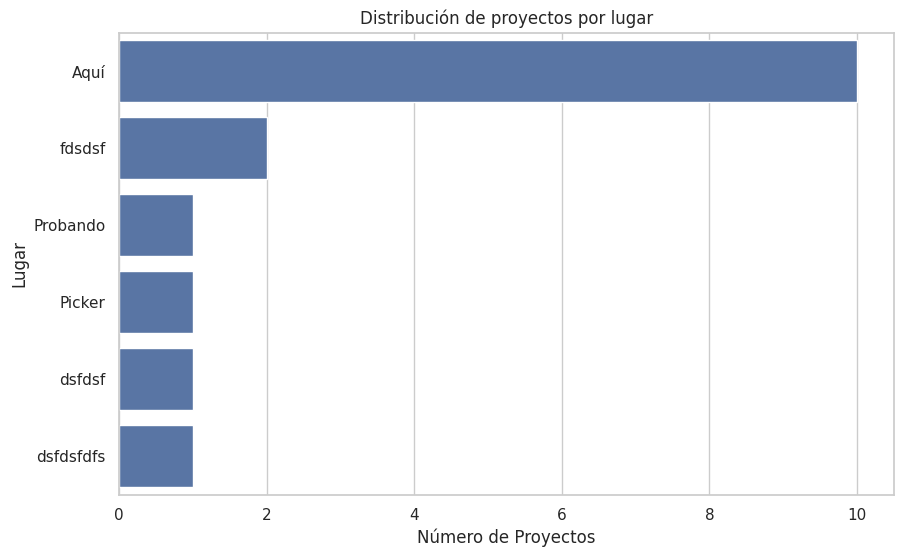

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='TX_LUGAR', data=projects_df, order=projects_df['TX_LUGAR'].value_counts().index);
plt.xlabel('Número de Proyectos');
plt.ylabel('Lugar');
plt.title('Distribución de proyectos por lugar');
plt.show();

# Asignaciones

Distribución de proyectos por empleado

Index([1, 32, 34], dtype='int64', name='ID_EMPLEADO')


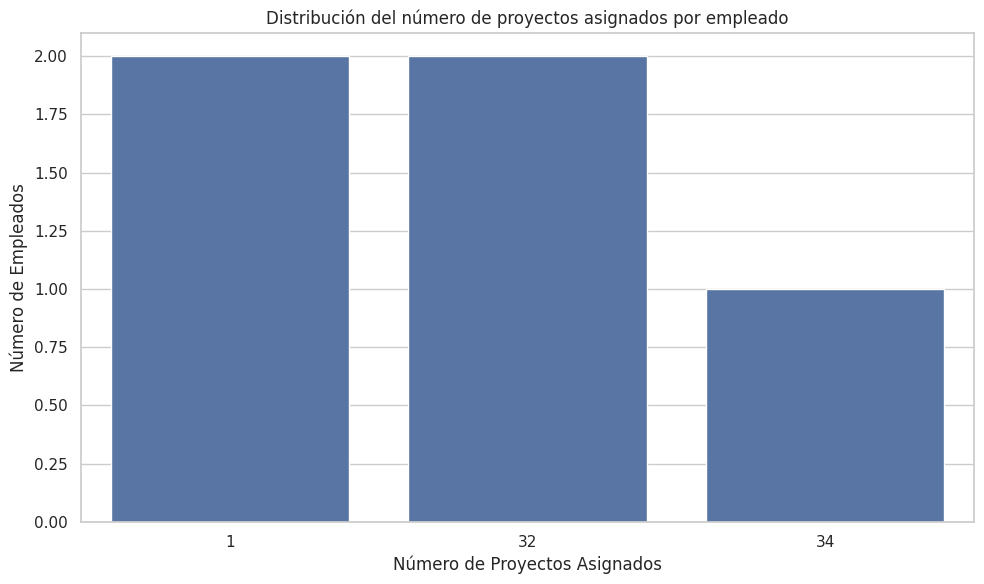

In [27]:
asignations_df['fecha_alta'] = pd.to_datetime(asignations_df['F_ALTA']);

projects_per_employee = asignations_df.groupby('ID_EMPLEADO').size();

print(projects_per_employee.index)

plt.figure(figsize=(10,6));
sns.barplot(x=projects_per_employee.index,y=projects_per_employee.values);
plt.xlabel('Número de Proyectos Asignados');
plt.ylabel('Número de Empleados');
plt.title('Distribución del número de proyectos asignados por empleado');
plt.tight_layout();
plt.show();

Top 5 proyectos con más personas asignadas

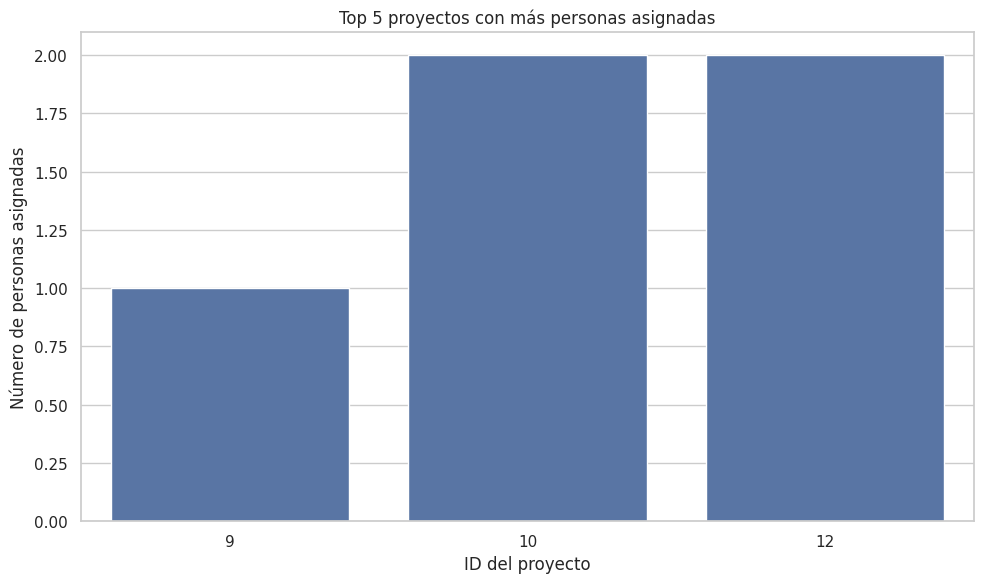

In [ ]:
asignations_per_project = asignations_df.groupby('ID_PROYECTO').size().sort_values(ascending=False);
top5_asigned_projects = asignations_per_project.head(5);

plt.figure(figsize=(10,6));
sns.barplot(x=top5_asigned_projects.index, y=top5_asigned_projects.values);
plt.xlabel('ID del proyecto');
plt.ylabel('Número de personas asignadas'),
plt.title('Top 5 proyectos con más personas asignadas');
plt.tight_layout();
plt.show();

Proyectos sin personas asignadas

In [ ]:
no_asigned_projects = projects_df[~projects_df['ID_PROYECTO'].isin(asignations_df['ID_PROYECTO'])];

print ('Listado de proyectos sin personas asignadas:');
print(no_asigned_projects);

Listado de proyectos sin personas asignadas:
    ID_PROYECTO          TX_DESCRIPCION    F_INICIO       F_FIN      F_BAJA  \
0             1                Probando  2001-07-22  2002-04-25  2002-04-26   
1             2                Probando  2001-07-22         NaN  2002-04-25   
2             3                Probando  2001-07-22  2002-04-25  2024-05-15   
3             4                Probando  2001-07-22  2002-04-25  2024-05-15   
4             5                Probando  2001-07-22  2002-04-25  2024-05-15   
5             6                Probando  2001-07-22  2002-04-25  2024-05-15   
6             7                Probando  2001-07-22  2002-04-25  2024-05-15   
7             8                Probando  2001-07-22  2002-04-25  2024-05-15   
10           11  Probando Observaciones  2001-07-22  2001-07-22  2024-05-19   
12           13                   fsfds  2024-05-01  2024-05-06         NaN   
13           14                  fdsdsf  2024-05-17  2024-05-11         NaN   
14     